<a href="https://colab.research.google.com/github/ManavGuru/Portfolio/blob/master/CSCE633_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#IMPORTING THE DATA FROM THE DATASETS.
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from skimage import data, io, filters
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold


path_users = "/content/drive/My Drive/ML Project /users.dat"
path_ratings = "/content/drive/My Drive/ML Project /ratings.dat"
path_movies = "/content/drive/My Drive/ML Project /movies.dat"

#Data Preparation


In [0]:
AGES = { 1: "Under 18", 18: "18-24", 25: "25-34", 35: "35-44", 45: "45-49", 50: "50-55", 56: "56+" }
OCCUPATIONS = { 0: "other or not specified", 1: "academic/educator", 2: "artist", 3: "clerical/admin",
                4: "college/grad student", 5: "customer service", 6: "doctor/health care",
                7: "executive/managerial", 8: "farmer", 9: "homemaker", 10: "K-12 student", 11: "lawyer",
                12: "programmer", 13: "retired", 14: "sales/marketing", 15: "scientist", 16: "self-employed",
                17: "technician/engineer", 18: "tradesman/craftsman", 19: "unemployed", 20: "writer" }

ratings = pd.read_csv(path_ratings,sep = '::', engine='python', names=['user_id', 'movie_id', 'rating', 'timestamp'])
max_userid = ratings['user_id'].drop_duplicates().max()
# Set max_movieid to the maximum movie_id in the ratings
max_movieid = ratings['movie_id'].drop_duplicates().max()

# Process ratings dataframe for Keras Deep Learning model
# Add user_emb_id column whose values == user_id - 1
ratings['user_emb_id'] = ratings['user_id'] - 1
# Add movie_emb_id column whose values == movie_id - 1
ratings['movie_emb_id'] = ratings['movie_id'] - 1

users = pd.read_csv(path_users, 
                    sep='::', 
                    engine='python', 
                    names=['user_id', 'gender', 'age', 'occupation', 'zipcode'])
users['age_desc'] = users['age'].apply(lambda x: AGES[x])
users['occ_desc'] = users['occupation'].apply(lambda x: OCCUPATIONS[x])

movies = pd.read_csv(path_movies,sep='::', 
                     engine ='python',
                     names = ['movie_id', 'title', 'genres'])

dataset = pd.merge(pd.merge(movies,ratings),users)


#EXPLORATION


In [7]:
#computing the number of unique users and movies in this dataset: 
noOfUsers = ratings.user_id.unique().shape[0]
noOfMovies = ratings.movie_id.unique().shape[0]
print("The no. of unique users is : {0}\nThe no. of unique movies is: {1}".format(noOfUsers,noOfMovies))

The no. of unique users is : 6040
The no. of unique movies is: 3706


In [8]:
print(users.info())
print(users.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zipcode     6040 non-null   object
 5   age_desc    6040 non-null   object
 6   occ_desc    6040 non-null   object
dtypes: int64(3), object(4)
memory usage: 330.4+ KB
None
   user_id gender  age  occupation zipcode  age_desc              occ_desc
0        1      F    1          10   48067  Under 18          K-12 student
1        2      M   56          16   70072       56+         self-employed
2        3      M   25          15   55117     25-34             scientist
3        4      M   45           7   02460     45-49  executive/managerial
4        5      M   25          20   55455     25-34                writer


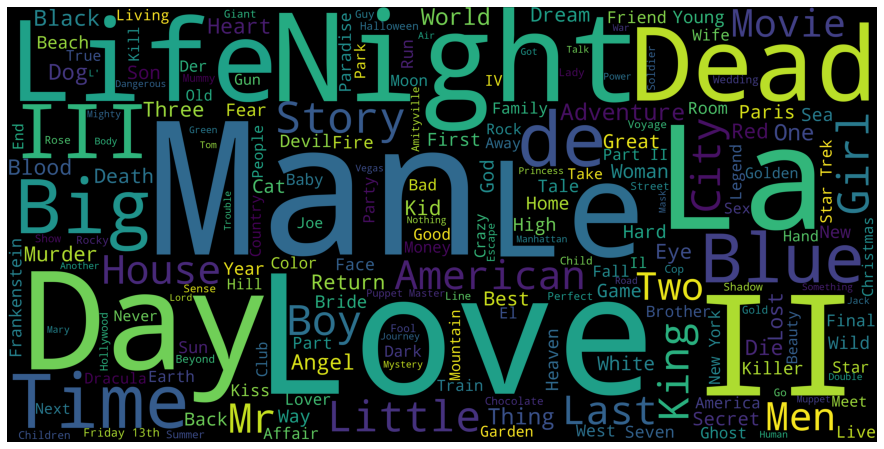

In [35]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

movies['title'] = movies['title'].fillna("").astype('str')
title_list = ' '.join(movies['title'])
title_cloud = WordCloud(stopwords=STOPWORDS, height=2000, width=4000).generate(title_list)

plt.figure(figsize=(16,8))
plt.axis('off')
plt.imshow(title_cloud)
plt.show()

In [9]:
import seaborn as sns
import pandas.util.testing as tm
ratings['rating'].describe()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

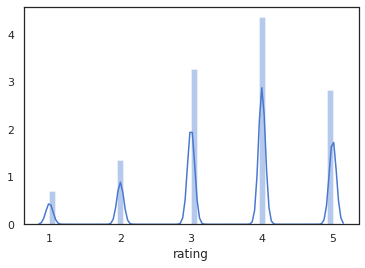

In [10]:
sns.set(style="white", palette="muted", color_codes=True)
sns.distplot(ratings['rating'])

In [8]:
dataset[['title','genres','rating']].sort_values('rating', ascending=False).head(20)

,title,genres,rating
0,Toy Story (1995),Animation|Children's|Comedy,5
489283,American Beauty (1999),Comedy|Drama,5
489259,Election (1999),Comedy,5
489257,"Matrix, The (1999)",Action|Sci-Fi|Thriller,5
489256,Dead Ringers (1988),Drama|Thriller,5
489237,Rushmore (1998),Comedy,5
489236,"Simple Plan, A (1998)",Crime|Thriller,5
489226,Hands on a Hard Body (1996),Documentary,5
489224,Pleasantville (1998),Comedy,5
489212,Say Anything... (1989),Comedy|Drama|Romance,5


In [11]:
count = [0,0,0,0,0]
for i in dataset['rating']: 
  count[i-1] = count[i-1]+1

print("USER RATINGS\n_____________")
print("\n1 Star:{0}\n2 Star:{1}\n3 Star:{2}\n4 Star:{3}\n5 Star:{4}\n_____________\nTotal:{5} ratings".
      format(count[0],count[1],count[2],count[3],count[4],sum(count)))

USER RATINGS
_____________

1 Star:56174
2 Star:107557
3 Star:261197
4 Star:348971
5 Star:226310
_____________
Total:1000209 ratings


In [0]:
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [13]:
keyword_occurences, dum = count_word(movies, 'genres', genre_labels)
print("Movie\t\tNumber of Entries\n---------\t--------------------- ")
keyword_occurences = np.array(keyword_occurences)
for i in range (len(keyword_occurences)):
  print("{0}\t\t\t{1}\n".format(keyword_occurences[i][0],keyword_occurences[i][1]).ljust(10))

Movie		Number of Entries
---------	--------------------- 
Drama			1603

Comedy			1200

Action			503

Thriller			492

Romance			471

Horror			343

Adventure			283

Sci-Fi			276

Children's			251

Crime			211

War			143

Documentary			127

Musical			114

Mystery			106

Animation			105

Western			68

Fantasy			68

Film-Noir			44



#Data pre-processing



In [0]:
# Creating a train, test and validation dataset
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(ratings, test_size=0.2)
data_test, data_valid = train_test_split(ratings, test_size = 0.5)

In [15]:
# Fill NaN values in user_id and movie_id column with 0
ratings['user_id'] = ratings['user_id'].fillna(0)
ratings['movie_id'] = ratings['movie_id'].fillna(0)

# Replace NaN values in rating column with average of all values
ratings['rating'] = ratings['rating'].fillna(ratings['rating'].mean())
print(ratings.info())
data_subset = ratings.sample(frac= 0.02)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype
---  ------        --------------    -----
 0   user_id       1000209 non-null  int64
 1   movie_id      1000209 non-null  int64
 2   rating        1000209 non-null  int64
 3   timestamp     1000209 non-null  int64
 4   user_emb_id   1000209 non-null  int64
 5   movie_emb_id  1000209 non-null  int64
dtypes: int64(6)
memory usage: 45.8 MB
None


In [0]:
ratings = ratings.drop(labels=[ 'user_emb_id',
       'movie_emb_id'],axis =1)

In [0]:
dataset_in = dataset.drop(labels=['title', 'genres','user_emb_id', 'movie_emb_id', 'gender','age_desc','occ_desc','zipcode'],axis=1)

In [0]:
# Convert titles to string value
dataset['title'] = dataset['title'].fillna("").astype('str')
# Convert genres to string value
dataset['genres'] = dataset['genres'].fillna("").astype('str')
# Convert occupation description to string value
dataset['occ_desc'] = dataset['occ_desc'].fillna("").astype('str')

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix_genres = tf.fit_transform(dataset['genres'])
print(tfidf_matrix_genres.shape)

tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix_occ = tf.fit_transform(dataset['occ_desc'])
print(tfidf_matrix_occ.shape)

tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix_title = tf.fit_transform(dataset['occ_desc'])
print(tfidf_matrix_title.shape)

(1000209, 127)
(1000209, 46)
(1000209, 46)


         movie_id  user_id  rating  timestamp  age  occupation
0               1        1       5  978824268    1          10
1              48        1       5  978824351    1          10
2             150        1       5  978301777    1          10
3             260        1       4  978300760    1          10
4             527        1       5  978824195    1          10
...           ...      ...     ...        ...  ...         ...
1000204      3513     5727       4  958489970   25           4
1000205      3535     5727       2  958489970   25           4
1000206      3536     5727       5  958489902   25           4
1000207      3555     5727       3  958490699   25           4
1000208      3578     5727       5  958490171   25           4

[1000209 rows x 6 columns]


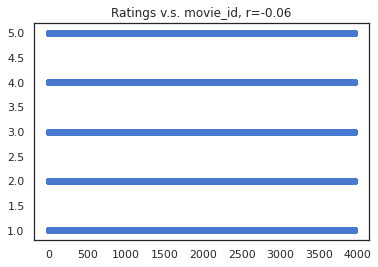

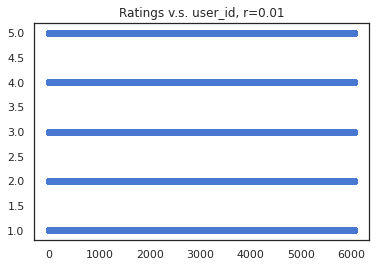

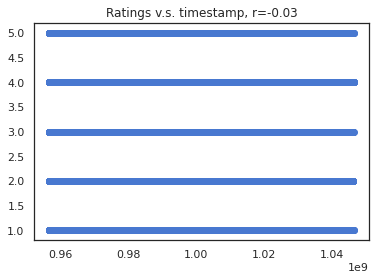

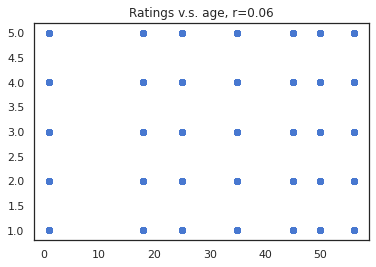

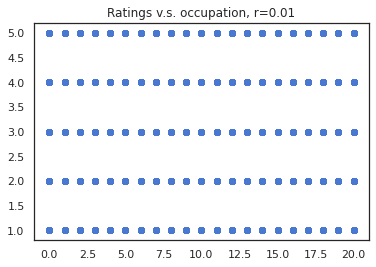

In [19]:
#pearson's r between features vs ratings 
from scipy.stats import pearsonr

print(dataset_in)
dataset_in = dataset_in.drop(labels=['rating'],axis=1)
target = dataset.rating
for i in dataset_in.columns: 
  plt.scatter(dataset_in[i],target)
  corr,p = pearsonr(dataset_in[i],target)
  plt.title("Ratings v.s. " + i + ", r=" + str(format(corr, '.2f')))
  plt.show()

In [20]:
for i in dataset_in.columns:
  for j in dataset_in.columns:
    corr, p = pearsonr(dataset_in[i], dataset_in[j])
    print(format(corr, '.2f'), end = ',')
  print()


1.00,-0.02,0.04,0.03,0.01,
-0.02,1.00,-0.49,0.03,-0.03,
0.04,-0.49,1.00,-0.06,0.02,
0.03,0.03,-0.06,1.00,0.08,
0.01,-0.03,0.02,0.08,1.00,


In [0]:
data_train, data_test, target_train, target_test = train_test_split(dataset_in,target, test_size=0.2)
data_test, data_valid, target_test, target_valid = train_test_split(data_test,target_test,test_size = 0.5)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

lr = LinearRegression()
lr.fit(data_train,target_train)

train_score, train_score_p = pearsonr(lr.predict(data_train),target_train)
print("r=" + format(train_score, '.2f') + ", p=" + format(train_score_p, '.2f'))

test_score, test_score_p = pearsonr(lr.predict(data_test),target_test)
print("r=" + format(test_score, '.2f') + ", p=" + format(test_score_p, '.2f'))

r=0.09, p=0.00
r=0.09, p=0.00


In [23]:
# Randomly sample 1% of the ratings dataset
small_data = dataset_in.sample(frac=0.02)
# Check the sample info
print(small_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20004 entries, 671785 to 527272
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   movie_id    20004 non-null  int64
 1   user_id     20004 non-null  int64
 2   timestamp   20004 non-null  int64
 3   age         20004 non-null  int64
 4   occupation  20004 non-null  int64
dtypes: int64(5)
memory usage: 937.7 KB
None


In [0]:
data_train, data_test= train_test_split(small_data, test_size=0.2)
# data_test, data_valid= train_test_split(data_test, test_size = 0.5)

In [33]:
# Create two user-item matrices, one for training and another for testing
train_data_matrix = np.array(data_train.drop(labels=['age', 'occupation'],axis=1))
test_data_matrix = np.array(data_test.drop(labels=['age', 'occupation'],axis=1))

# Check their shape
print(train_data_matrix.shape)
print(test_data_matrix.shape)

(16003, 3)
(4001, 3)


In [35]:
from sklearn.metrics.pairwise import pairwise_distances
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(train_data_matrix.T, metric='correlation')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.         -0.01479626  0.03406019]
 [-0.01479626  1.         -0.48371933]
 [ 0.03406019 -0.48371933  1.        ]]


In [0]:
# Function to predict ratings
def predict(ratings, similarity):
    pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to calculate RMSE
def rmse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))

In [0]:
item_prediction = predict(train_data_matrix, item_correlation)

In [39]:
# RMSE on the test data
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

Item-based CF RMSE: 264455589.246584


In [40]:
# RMSE on the train data
print('Item-based CF RMSE: ' + str(rmse(item_prediction, train_data_matrix)))

Item-based CF RMSE: 264269704.02283144


#PCA Implementation


In [0]:
Ratings = ratings.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0)

In [0]:
# Data_Preprocessing for zero mean
R = Ratings.to_numpy()
user_ratings_mean = np.mean(R, axis = 1)
Ratings_demeaned = R - user_ratings_mean.reshape(-1, 1)

In [146]:
from numpy import mean
from numpy import cov
from numpy.linalg import eig

V = cov(Ratings_demeaned.T)
values, vectors = eig(V)
new_vectors=np.argsort(values)[-50:]
new_values = []
Vt = []
U = []

for i in new_vectors:
  new_values.append(values[i])
  Vt.append(vectors[i])
  U.append(R.T[i])
sigma= np.diag(new_values)

Vt = np.array(Vt)
U = np.array(U)
P = np.dot(np.dot(U.T, sigma), Vt)
P = P + user_ratings_mean.reshape(-1, 1)
P = pd.DataFrame(P, columns = Ratings.columns)
P.head()

movie_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,3913,3914,3915,3916,3917,3918,3919,3920,3921,3922,3923,3924,3925,3926,3927,3928,3929,3930,3931,3932,3933,3934,3935,3936,3937,3938,3939,3940,3941,3942,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
0,-54.567852+0.000000j,15.089488+0.000000j,28.505553+0.000000j,48.413456+0.000000j,47.102674+0.000000j,51.276238+0.000000j,45.523550+0.000000j,66.367132+0.000000j,36.609088+0.000000j,53.377525+0.000000j,-30.397576+0.000000j,-35.091283+0.000000j,143.503668+0.000000j,2.365997+0.000000j,67.195652+0.000000j,11.115799+0.000000j,64.215775+0.000000j,-25.415810+0.000000j,-124.724299+0.000000j,40.363455+0.000000j,-30.347165+0.000000j,3.616008+0.000000j,-30.540848+0.000000j,-25.113777+0.000000j,39.823906+0.000000j,-21.670289+0.000000j,-23.299115+0.000000j,0.783497+0.000000j,-45.431629+0.000000j,-3.748489+0.000000j,-14.937898+0.000000j,23.107443+0.000000j,-74.318411+0.000000j,4.679293+0.000000j,-134.062392+0.000000j,-58.982320+0.000000j,9.568283+0.000000j,60.356657+0.000000j,-11.819215+0.000000j,78.612021+0.000000j,...,-2.514878+0.785009j,-2.514878-0.785009j,1.341157-1.034735j,1.341157+1.034735j,-0.918739-1.238772j,-0.918739+1.238772j,-0.728562+0.026748j,-0.728562-0.026748j,-0.815450+0.639113j,-0.815450-0.639113j,1.499714+0.285163j,1.499714-0.285163j,2.028697+0.309977j,2.028697-0.309977j,-0.242295+0.661035j,-0.242295-0.661035j,0.376458-0.114115j,0.376458+0.114115j,-0.829116+0.000000j,0.026482+0.530164j,0.026482-0.530164j,-0.458286+0.322006j,-0.458286-0.322006j,-0.665343-0.050425j,-0.665343+0.050425j,0.488490-0.201039j,0.488490+0.201039j,0.113436+0.000000j,0.442304-0.160214j,0.442304+0.160214j,-0.249185+0.000000j,0.040672-0.179507j,0.040672+0.179507j,0.149755+0.000000j,-0.066106+0.000000j,-0.046783-0.086174j,-0.046783+0.086174j,0.079553+0.000000j,0.054480+0.000000j,0.059036+0.000000j
1,-0.210675+0.000000j,0.192335+0.000000j,0.314633+0.000000j,-0.025535+0.000000j,-0.025579+0.000000j,0.014184+0.000000j,0.463072+0.000000j,0.307100+0.000000j,-0.561120+0.000000j,0.302005+0.000000j,0.234030+0.000000j,0.023983+0.000000j,0.651877+0.000000j,-0.014114+0.000000j,0.002198+0.000000j,0.061191+0.000000j,0.210533+0.000000j,0.190321+0.000000j,0.086738+0.000000j,0.114742+0.000000j,0.029040+0.000000j,0.165448+0.000000j,0.058161+0.000000j,0.143793+0.000000j,-0.255542+0.000000j,-0.105775+0.000000j,0.382326+0.000000j,0.099031+0.000000j,0.195113+0.000000j,-0.258710+0.000000j,0.210252+0.000000j,-0.071883+0.000000j,0.029771+0.000000j,0.215070+0.000000j,0.537549+0.000000j,-0.129273+0.000000j,0.553206+0.000000j,0.121578+0.000000j,0.321543+0.000000j,0.287700+0.000000j,...,0.108877+0.006211j,0.108877-0.006211j,0.139388-0.008187j,0.139388+0.008187j,0.121506-0.009802j,0.121506+0.009802j,0.123011+0.000212j,0.123011-0.000212j,0.122324+0.005057j,0.122324-0.005057j,0.140642+0.002256j,0.140642-0.002256j,0.144828+0.002453j,0.144828-0.002453j,0.126859+0.005230j,0.126859-0.005230j,0.131755-0.000903j,0.131755+0.000903j,0.122215+0.000000j,0.128985+0.004195j,0.128985-0.004195j,0.125150+0.002548j,0.125150-0.002548j,0.123511-0.000399j,0.123511+0.000399j,0.132641-0.001591j,0.132641+0.001591j,0.129673+0.000000j,0.132276-0.001268j,0.132276+0.001268j,0.126804+0.000000j,0.129098-0.001420j,0.129098+0.001420j,0.129961+0.000000j,0.128253+0.000000j,0.128406-0.000682j,0.128406+0.000682j,0.129773+0.000000j,0.129235+0.000000j,0.128935+0.000000j
2,0.053697+0.000000j,0.053697+0.000000j,0.053697+0.000000j,0.053697+0.000000j,0.053697+0.000000j,0.053697+0.000000j,0.053697+0.000000j,0.053697+0.000000j,0.053697+0.000000j,0.053697+0.000000j,0.053697+0.000000j,0.053697+0.000000j,0.053697+0.000000j,0.053697+0.000000j,0.053697+0.000000j,0.053697+0.000000j,0.053697+0.000000j,0.053697+0.000000j,0.053697+0.000000j,0.053697+0.000000j,0.053697+0.000000j,0.053697+0.000000j,0.053697+0.000000j,0.053697+0.000000j,0.053697+0.000000j,0.053697+0.000000j,0.053697+0.000000j,0.053697+0.000000j,0.05369

In [0]:
# SVD for dimensionality reduction
sigma_list = []
U_list = []
Vt_list = []
for i in range (1,11): 
  from scipy.sparse.linalg import svds 
  U, sigma, Vt = svds(Ratings_demeaned, k=i*10)
  sigma_list.append(sigma)
  U_list.append(U)
  Vt_list.append(Vt)
s= []
for i in range(len(sigma_list)):
  Lambda_d_sum = sum(sum(U_list[i]))
  Lambda_k_sum = sum(sigma_list[i])
  sk = Lambda_k_sum/Lambda_d_sum
  s.append(sk)



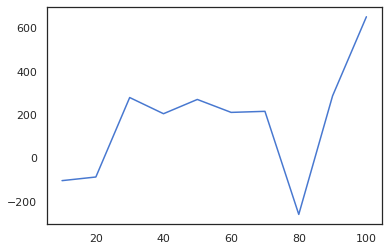

In [75]:
k =[10,20,30,40,50,60,70,80,90,100]
plt.plot(k,s)

In [0]:
def reconstruct_data(U,sigma,Vt):
  sigma = np.diag(sigma)
  all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
  preds = pd.DataFrame(all_user_predicted_ratings, columns = Ratings.columns)

In [0]:
sigma = np.diag(sigma)

In [0]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [0]:
preds = pd.DataFrame(all_user_predicted_ratings, columns = Ratings.columns)

In [79]:
preds.head()

movie_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,3913,3914,3915,3916,3917,3918,3919,3920,3921,3922,3923,3924,3925,3926,3927,3928,3929,3930,3931,3932,3933,3934,3935,3936,3937,3938,3939,3940,3941,3942,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
0,5.157608,0.184833,0.348341,-0.022609,0.139622,-0.156937,-0.061122,0.072117,0.018278,-0.372566,-0.275992,-0.069156,0.246304,-0.063621,-0.024842,-0.513155,0.335299,0.092736,0.194696,-0.057831,-0.574234,0.308568,0.114135,0.041081,-0.424918,0.018152,0.116922,0.091098,0.027727,-0.077010,0.099955,0.160618,-0.013699,0.886526,0.064520,0.303630,0.034403,-0.001414,0.033341,-0.031944,...,-0.034276,-0.044527,-0.060558,0.195426,0.120400,0.079027,0.021346,-0.063318,0.045811,0.022416,-0.038191,-0.006612,-0.051809,0.119026,0.258218,0.079127,0.141241,0.058242,-0.008395,-0.008295,0.001834,0.020542,0.045301,-0.018324,0.042241,0.005276,-0.002719,-0.006197,0.012611,-0.006819,-0.111771,-0.002460,0.016625,-0.107081,-0.051609,0.022706,-0.114028,0.009476,0.070798,-0.195959
1,0.557186,0.296927,0.078853,-0.013888,0.028675,1.092160,-0.054492,0.114191,0.090106,1.695371,0.611882,0.087985,0.003379,0.016751,0.075879,0.331407,0.960864,-0.132297,-0.142823,0.206481,2.108353,-0.053961,-0.085204,0.494408,0.476192,0.141869,-0.012997,-0.020694,0.131328,0.103694,-0.002540,-0.601077,-0.015022,0.206942,0.004142,0.905437,-0.029560,-0.078110,0.211816,0.112644,...,-0.058046,-0.012525,-0.019198,0.273478,-0.141121,-0.027316,-0.004104,-0.103116,-0.081570,-0.074641,0.043918,-0.045679,-0.208366,0.112719,0.090520,0.050413,-0.082976,0.062697,0.009750,0.045907,0.023241,0.034275,0.028305,0.055477,0.005384,0.031939,-0.000152,-0.000859,0.008209,0.014458,0.002564,-0.022910,-0.031687,0.072002,-0.008174,-0.418219,-0.225593,-0.005716,0.033955,0.039606
2,2.176318,0.396428,0.302057,-0.117164,-0.006330,0.077833,0.000836,0.064654,-0.018309,1.062417,-0.231946,0.045935,0.072181,-0.035194,0.075160,0.093711,0.090531,0.092967,0.104518,0.085493,0.181214,0.097249,0.093328,-0.008691,0.057006,0.098503,0.029098,-0.084611,0.052402,0.008617,0.028236,-0.172849,-0.019065,-0.185306,-0.072634,0.625659,-0.040098,-0.031897,-0.075246,-0.019920,...,0.008204,0.008142,0.008724,-0.115342,0.094806,0.004091,0.027952,-0.060123,0.030876,0.050115,0.033782,0.035561,0.063256,-0.068565,0.062014,0.136386,-0.019941,0.077724,0.014739,0.082539,0.018217,-0.009858,0.006366,0.213957,0.018074,0.022167,0.002880,-0.007270,0.010879,0.002390,0.036894,-0.008054,0.026507,0.053735,0.025591,0.024825,0.169800,0.061687,0.028985,-0.243151
3,0.194185,0.155507,0.046863,0.047477,-0.014495,0.247765,-0.057580,-0.006338,0.007387,-0.423240,-0.267654,0.000195,0.027090,0.060885,-0.082275,-0.097232,0.093679,0.054710,-0.015947,0.052337,0.487259,0.032751,-0.024735,0.068946,0.274606,0.030638,0.043147,0.004252,-0.033745,0.026750,-0.064325,-0.371439,-0.008087,0.220510,-0.003785,0.061929,-0.032692,0.016569,0.069864,-0.040580,...,0.002946,-0.036694,0.021411,-0.149151,-0.063459,-0.016719,-0.016469,0.004339,-0.014491,-0.004899,-0.031714,-0.019740,-0.093796,-0.025795,-0.097493,-0.068208,-0.055620,-0.069503,-0.021997,-0.065311,-0.010379,-0.004561,-0.014769,-0.026635,-0.093286,0.006983,-0.007761,-0.000343,-0.005788,-0.005467,-0.049155,-0.010652,0.007342,-0.005267,-0.031352,-0.166973,0.022989,-0.033161,-0.011156,-0.129075
4,0.243474,-0.491501,-0.008307,0.139973,-0.204174,1.664607,-0.133342,-0.047117,-0.118995,0.129404,-0.262725,0.046755,-0.037079,0.330652,0.037601,1.244568,1.387848,0.176307,-0.080069,-0.072893,1.598565,-0.070524,-0.198231,0.167816,1.850990,0.146188,-0.099188,0.270459,1.687006,0.356623,-0.027282,2.584650,0.041376,2.342741,0.186872,1.414517,0.061650,0.044759,1.929511,0.132519,...,0.062886,0.418032,-0.051663,-0.545264,0.191609,0.069984,0.003665,0.121918,0.055437,0.023295,0.025026,0.017404,-0.090172,-0.103155,-0.004015,0.195176,-0.306943,0.159715,0.032599,-0.075235,0.015002,0.058717,0.020635,-0.089651,-0.058825,0.047030,0.063082

In [80]:
ratings.head()

,user_id,movie_id,rating,timestamp,user_emb_id,movie_emb_id
0,1,1193,5,978300760,0,1192
1,1,661,3,978302109,0,660
2,1,914,3,978301968,0,913
3,1,3408,4,978300275,0,3407
4,1,2355,5,978824291,0,2354


In [0]:
def recommend_movies(predictions, userID, movies, original_ratings, num_recommendations):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # User ID starts at 1, not 0
    sorted_user_predictions = preds.iloc[user_row_number].sort_values(ascending=False)
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings[original_ratings.user_id == (userID)]
    #adding information about the movie. This is not part of the prediction just for visualisation
    user_full = (user_data.merge(movies, how = 'left', left_on = 'movie_id', right_on = 'movie_id').
                     sort_values(['rating'], ascending=False)
                 )

    print('User {0} has already rated {1} movies.'.format(userID, user_full.shape[0]))
    print('Recommending highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies[~movies['movie_id'].isin(user_full['movie_id'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'movie_id',
               right_on = 'movie_id').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

In [85]:
already_rated, predictions = recommend_movies(preds, 65, movies, ratings, 50)

User 65 has already rated 121 movies.
Recommending highest 50 predicted ratings movies not already rated.


In [86]:
already_rated.head(10)

,user_id,movie_id,rating,timestamp,user_emb_id,movie_emb_id,title,genres
120,65,1246,5,987383453,64,1245,Dead Poets Society (1989),Drama
100,65,1124,5,983853171,64,1123,On Golden Pond (1981),Drama
54,65,3252,5,977888608,64,3251,Scent of a Woman (1992),Drama
53,65,1573,5,986615241,64,1572,Face/Off (1997),Action|Sci-Fi|Thriller
94,65,500,5,977888587,64,499,Mrs. Doubtfire (1993),Comedy
51,65,969,5,986615227,64,968,"African Queen, The (1951)",Action|Adventure|Romance|War
95,65,1036,5,986615095,64,1035,Die Hard (1988),Action|Thriller
49,65,2431,5,991369357,64,2430,Patch Adams (1998),Comedy|Drama
48,65,953,5,1041090068,64,952,It's a Wonderful Life (1946),Drama
96,65,434,5,986615715,64,433,Cliffhanger (1993),Action|Adventure|Crime


In [87]:
predictions.head(50)

,movie_id,title,genres
442,457,"Fugitive, The (1993)",Action|Thriller
339,349,Clear and Present Danger (1994),Action|Adventure|Thriller
570,590,Dances with Wolves (1990),Adventure|Drama|Western
2210,2355,"Bug's Life, A (1998)",Animation|Children's|Comedy
1826,1961,Rain Man (1988),Drama
1865,2001,Lethal Weapon 2 (1989),Action|Comedy|Crime|Drama
3082,3256,Patriot Games (1992),Action|Thriller
3606,3793,X-Men (2000),Action|Sci-Fi
1302,1370,Die Hard 2 (1990),Action|Thriller
1597,1704,Good Will Hunting (1997),Drama


In [95]:
#Evaluation of the model
from surprise import SVD
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate

reader = Reader()

# Load the movielens-100k dataset (download it if needed),
data = Dataset.load_from_df(ratings[['user_id', 'movie_id', 'rating']], reader)

# We'll use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8753  0.8748  0.8714  0.8723  0.8741  0.8736  0.0015  
Fit time          59.14   59.48   59.90   57.42   58.90   58.97   0.85    
Test time         2.76    2.99    2.78    2.45    2.76    2.75    0.17    


{'fit_time': (59.143911838531494,
  59.48141026496887,
  59.902074337005615,
  57.41506791114807,
  58.90307545661926),
 'test_rmse': array([0.87532321, 0.87482425, 0.87136265, 0.87230161, 0.87410427]),
 'test_time': (2.758392333984375,
  2.9852092266082764,
  2.7836737632751465,
  2.4511756896972656,
  2.761986017227173)}